In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
try:
    import empyrical as emp
except:
    emp = None
import tushare as ts
import time
import datetime
import random
import seaborn as sns

from common.config import Config
from spider.spider_nasdaq import Spider_nasdaq
from spider.spider_coinmarketcap import Spider_coinmarketcap

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/399300-2005-2019-TT-PARAMTEST-20190518221407.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['BUY_N', 'SELL_N', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN_ALGO'] > md]
# df
md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['WINRATE_YEARLY'] > md]
df

heat_df = df.pivot(index='BUY_N', columns='SELL_N', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

NameError: name 'df' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-2005-2019-20190522.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

# RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-close-MAXN-DAYSK-2005-2019-20190524.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

240

,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,1,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
1,1,0,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
2,1,2,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
3,1,3,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411
4,1,4,1,2.89347,2.872156,-0.723803,-0.724579,1.0,0.466667,0.105411


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.000000
mean,15.50000,3.500000,528.200000,25.373804,3.219344,-0.470941,-7.245794e-01,0.611721,0.630000,0.253422
std,8.67353,2.296076,315.403006,17.018297,0.204787,0.095638,4.042479e-15,0.074764,0.103621,0.069316
min,1.00000,0.000000,1.000000,1.189268,2.869227,-0.723803,-7.245794e-01,0.551008,0.400000,0.059507
25%,8.00000,1.750000,357.000000,11.673531,3.036867,-0.526007,-7.245794e-01,0.584580,0.533333,0.206436
50%,15.50000,3.500000,446.500000,20.679515,3.197939,-0.468064,-7.245794e-01,0.600485,0.666667,0.255430
75%,23.00000,5.250000,615.500000,35.505405,3.403040,-0.400692,-7.245794e-01,0.615195,0.733333,0.305502
max,30.00000,7.000000,2387.000000,74.390857,3.543274,-0.282405,-7.245794e-01,1.000000,0.866667,0.377921


,N,K,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
88,12,0,632,49.404240,3.186832,-0.395397,-0.724579,0.564800,0.800000,0.336360
89,12,1,632,49.404240,3.186832,-0.395397,-0.724579,0.564800,0.800000,0.336360
123,16,3,440,49.866503,3.158969,-0.408007,-0.724579,0.615561,0.800000,0.337720
130,17,2,466,47.338264,3.292665,-0.390450,-0.724579,0.619048,0.866667,0.332792
160,21,0,453,73.176478,3.390359,-0.357878,-0.724579,0.602222,0.800000,0.376263
161,21,1,453,73.176478,3.390359,-0.357878,-0.724579,0.602222,0.800000,0.376263
162,21,2,402,74.390857,3.390359,-0.357143,-0.724579,0.602500,0.800000,0.377921
166,21,6,315,61.668091,3.390359,-0.282405,-0.724579,0.608280,0.800000,0.359162
167,21,7,299,66.136813,3.390359,-0.320050,-0.724579,0.617450,0.800000,0.366123
170,22,2,392,72.949745,3.452261,-0.290190,-0.724579,0.618557,0.800000,0.376079


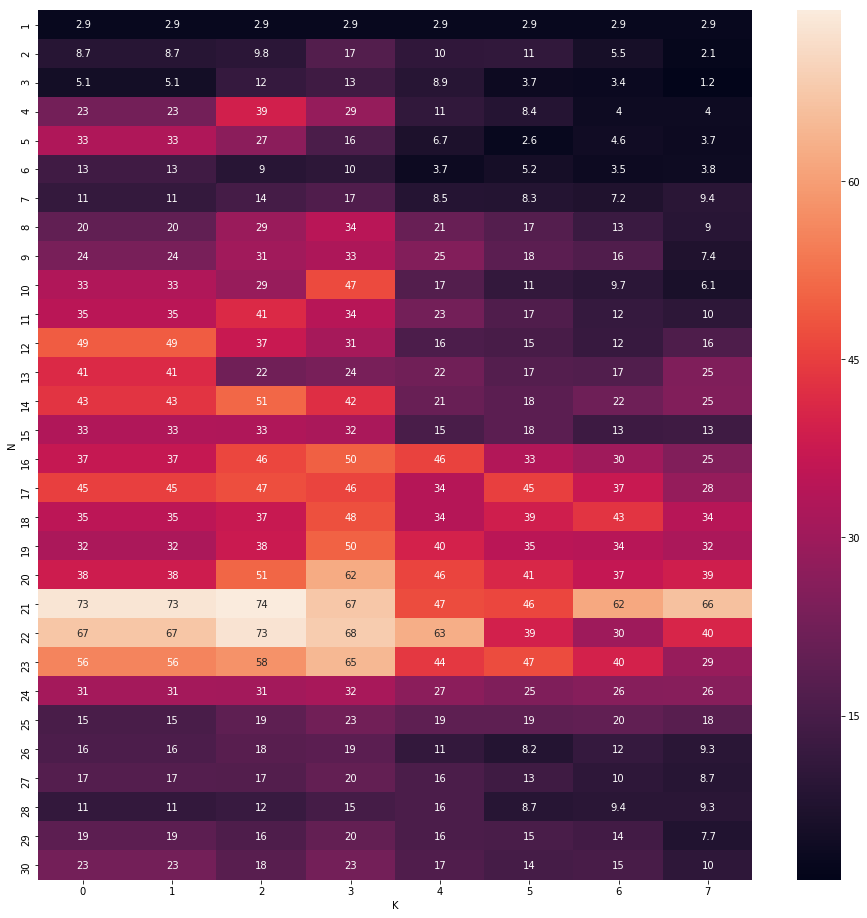

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-YESTERDAYclose-TODAYopen-MAXN-DAYSK-20190525.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

# df = pd.read_csv('../database/ETFROTATION-BITCOIN-2017-2019-20190528.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='K', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

780

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,6,442,0.527439,0.231851,-0.260732,-0.469167,0.600000,0.555556,0.054183
1,1,0,5,526,0.448000,0.231851,-0.258695,-0.469167,0.613462,0.555556,0.047193
2,1,0,7,400,0.427280,0.231851,-0.262385,-0.469167,0.596447,0.666667,0.045314
3,1,0,8,386,0.426532,0.231851,-0.271281,-0.469167,0.594241,0.555556,0.045246
4,1,0,9,364,0.425887,0.231851,-0.344002,-0.469167,0.590028,0.666667,0.045187


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,780.000000,780.0,780.000000,780.000000,780.000000,7.800000e+02,780.000000,7.800000e+02,780.000000,780.000000,780.000000
mean,15.500000,0.0,17.500000,435.688462,2.795810,2.318511e-01,-0.361734,-4.691670e-01,0.583619,0.687892,0.175601
std,8.660995,0.0,7.504812,162.065009,1.058769,2.638472e-15,0.056619,4.221554e-15,0.013054,0.101537,0.042172
min,1.000000,0.0,5.000000,163.000000,0.369085,2.318511e-01,-0.524521,-4.691670e-01,0.537994,0.444444,0.039908
25%,8.000000,0.0,11.000000,314.000000,1.976001,2.318511e-01,-0.398867,-4.691670e-01,0.575320,0.666667,0.145511
50%,15.500000,0.0,17.500000,389.000000,2.753605,2.318511e-01,-0.358712,-4.691670e-01,0.584567,0.666667,0.179119
75%,23.000000,0.0,24.000000,515.250000,3.473515,2.318511e-01,-0.323022,-4.691670e-01,0.592893,0.777778,0.205174
max,30.000000,0.0,30.000000,1110.000000,6.961150,2.318511e-01,-0.227345,-4.691670e-01,0.621918,0.888889,0.294888


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
168,7,0,17,439,4.750295,0.231851,-0.227345,-0.469167,0.600000,0.888889,0.243462
192,8,0,15,421,4.647346,0.231851,-0.336908,-0.469167,0.586124,0.888889,0.240667
193,8,0,16,424,4.564775,0.231851,-0.322534,-0.469167,0.574822,0.888889,0.238393
194,8,0,17,412,5.392730,0.231851,-0.236140,-0.469167,0.578431,0.888889,0.259976
217,9,0,14,420,4.886949,0.231851,-0.321761,-0.469167,0.593750,0.888889,0.247106
218,9,0,15,402,5.475552,0.231851,-0.301893,-0.469167,0.595477,0.888889,0.261998
245,10,0,16,418,5.002239,0.231851,-0.392482,-0.469167,0.583942,0.888889,0.250122
247,10,0,18,397,6.335909,0.231851,-0.264103,-0.469167,0.580153,0.888889,0.281762
248,10,0,19,383,5.939976,0.231851,-0.272149,-0.469167,0.584211,0.888889,0.272934
249,10,0,20,376,6.179604,0.231851,-0.251173,-0.469167,0.587131,0.888889,0.278328


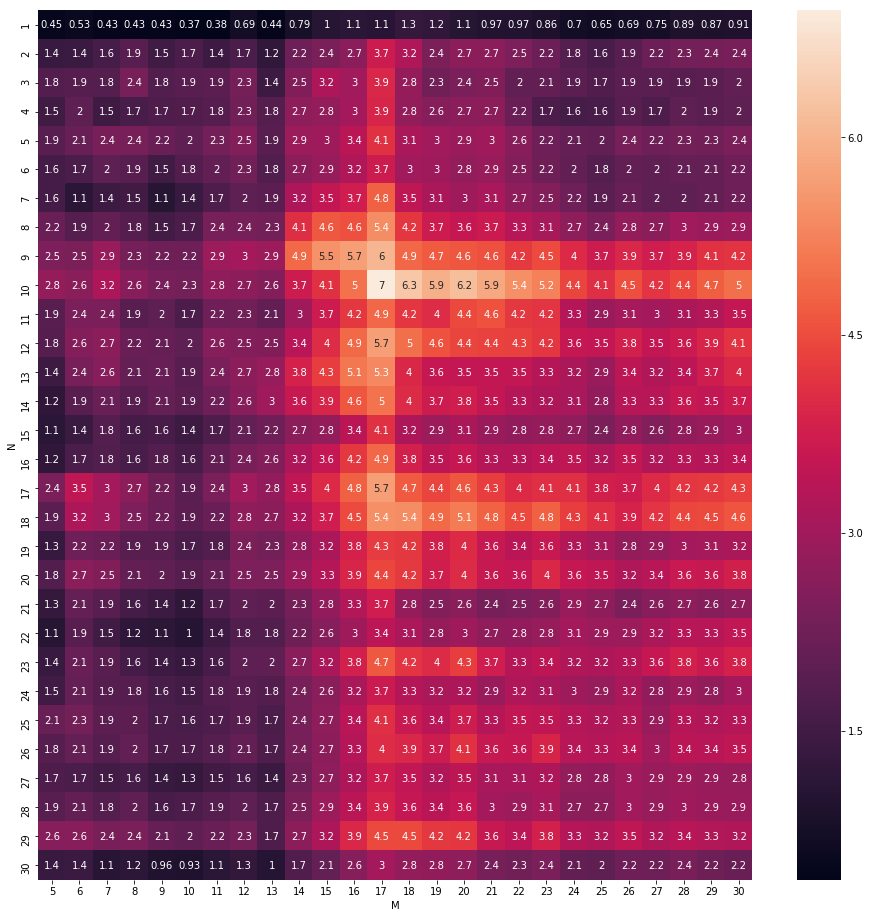

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-N-MAM-2011-2019-20190531-014218.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['WINRATE_YEARLY'] > WINRATE_YEARLY_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

780

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,6,106,0.031444,-0.620831,-0.424408,-0.815358,0.348315,0.5,0.016183
1,1,0,5,120,-0.070170,-0.620831,-0.403782,-0.815358,0.363636,0.5,-0.037021
2,1,0,8,86,-0.057667,-0.620831,-0.421083,-0.815358,0.310811,0.5,-0.030329
3,1,0,7,94,0.216423,-0.620831,-0.407395,-0.815358,0.311688,0.5,0.106924
4,1,0,10,78,-0.068411,-0.620831,-0.396437,-0.815358,0.285714,0.5,-0.036077


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,780.000000,780.0,780.000000,780.000000,780.000000,7.800000e+02,780.000000,7.800000e+02,780.000000,780.000000,780.000000
mean,15.500000,0.0,17.500000,101.401282,0.456188,-6.208309e-01,-0.660416,-8.153583e-01,0.389487,0.871154,0.190046
std,8.660995,0.0,7.504812,41.137725,0.620509,2.444058e-15,0.108748,3.110619e-15,0.050350,0.218822,0.255390
min,1.000000,0.0,5.000000,30.000000,-0.592548,-6.208309e-01,-0.860331,-8.153583e-01,0.222222,0.500000,-0.372206
25%,8.000000,0.0,11.000000,70.000000,-0.013817,-6.208309e-01,-0.736622,-8.153583e-01,0.359407,0.500000,-0.007188
50%,15.500000,0.0,17.500000,90.000000,0.330387,-6.208309e-01,-0.678789,-8.153583e-01,0.388889,1.000000,0.159538
75%,23.000000,0.0,24.000000,123.000000,0.812930,-6.208309e-01,-0.600185,-8.153583e-01,0.419777,1.000000,0.361368
max,30.000000,0.0,30.000000,273.000000,3.703006,-6.208309e-01,-0.212818,-8.153583e-01,0.531579,1.000000,1.231717


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
26,2,0,5,273,3.703006,-0.620831,-0.407944,-0.815358,0.516129,0.5,1.231717
27,2,0,6,265,2.441512,-0.620831,-0.370832,-0.815358,0.502075,0.5,0.898080
28,2,0,7,252,1.673110,-0.620831,-0.420140,-0.815358,0.491304,0.5,0.665007
30,2,0,9,249,1.776460,-0.620831,-0.472484,-0.815358,0.480176,1.0,0.698081
31,2,0,10,238,2.015558,-0.620831,-0.447297,-0.815358,0.475113,1.0,0.772397
32,2,0,12,233,2.247035,-0.620831,-0.465908,-0.815358,0.497696,1.0,0.841686
33,2,0,11,237,1.480578,-0.620831,-0.488640,-0.815358,0.474886,1.0,0.601707
34,2,0,14,229,1.625389,-0.620831,-0.492557,-0.815358,0.511848,1.0,0.649528
35,2,0,13,236,1.863460,-0.620831,-0.474101,-0.815358,0.495413,1.0,0.725466
36,2,0,15,222,1.511610,-0.620831,-0.495114,-0.815358,0.509804,1.0,0.612065


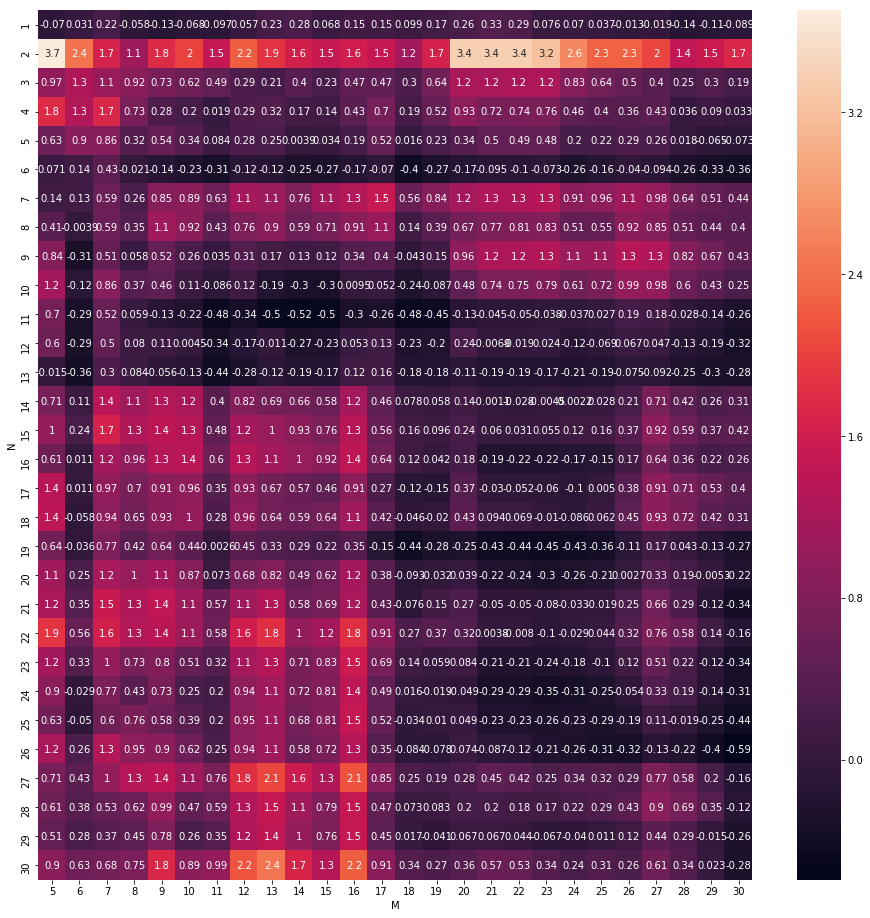

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-BITCOIN-2017-2019-20190531-231521.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['90%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['90%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

1600

,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
0,1,0,1,1,0.226802,0.231851,-0.463120,-0.469167,1.000000,0.444444,0.025790
1,1,0,2,1005,-0.091187,0.231851,-0.498952,-0.469167,0.596527,0.333333,-0.011840
2,1,0,3,732,0.165484,0.231851,-0.379338,-0.469167,0.612188,0.555556,0.019259
3,1,0,4,612,0.003487,0.231851,-0.330790,-0.469167,0.595357,0.333333,0.000434
4,1,0,5,524,-0.003925,0.231851,-0.335934,-0.469167,0.592664,0.333333,-0.000490


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
count,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1.600000e+03,1600.000000,1.600000e+03,1600.000000,1600.000000,1600.000000
mean,20.500000,0.0,20.500000,421.263750,2.117782,2.318511e-01,-0.406177,-4.691670e-01,0.578688,0.628611,0.141148
std,11.547005,0.0,11.547005,208.202142,1.245782,3.637117e-15,0.081897,1.321578e-14,0.025097,0.114442,0.062076
min,1.000000,0.0,1.000000,1.000000,-0.275070,2.318511e-01,-0.691068,-4.691670e-01,0.509506,0.222222,-0.039279
25%,10.750000,0.0,10.750000,278.000000,1.270614,2.318511e-01,-0.460397,-4.691670e-01,0.566550,0.555556,0.107551
50%,20.500000,0.0,20.500000,343.500000,2.056019,2.318511e-01,-0.400873,-4.691670e-01,0.579245,0.666667,0.149303
75%,30.250000,0.0,30.250000,494.000000,2.909217,2.318511e-01,-0.349982,-4.691670e-01,0.590082,0.666667,0.185100
max,40.000000,0.0,40.000000,1434.000000,9.882808,2.318511e-01,-0.183540,-4.691670e-01,1.000000,0.888889,0.346307


,N,K,M,ORDER,RETURN_ALGO,RETURN_BENC,MAXDROPDOWN_ALGO,MAXDROPDOWN_BENC,WINRATE_ORDER,WINRATE_YEARLY,ANNUAL_RETURN
40,2,0,1,1170,7.158137,0.231851,-0.278000,-0.469167,0.611208,0.888889,0.298837
255,7,0,16,438,4.354028,0.231851,-0.183540,-0.469167,0.604598,0.777778,0.232452
294,8,0,15,418,4.369889,0.231851,-0.269982,-0.469167,0.575904,0.888889,0.232906
295,8,0,16,417,4.788337,0.231851,-0.184874,-0.469167,0.578692,0.888889,0.244484
319,9,0,1,357,4.482572,0.231851,-0.270251,-0.469167,0.657143,0.777778,0.236099
333,9,0,14,407,4.644404,0.231851,-0.264377,-0.469167,0.580645,0.888889,0.240587
334,9,0,15,398,4.866135,0.231851,-0.232749,-0.469167,0.589873,0.888889,0.246556
335,9,0,16,390,5.553586,0.231851,-0.204471,-0.469167,0.582902,0.888889,0.263883
375,10,0,16,408,5.533619,0.231851,-0.226214,-0.469167,0.589552,0.888889,0.263402
376,10,0,17,398,6.034589,0.231851,-0.252190,-0.469167,0.582697,0.888889,0.275083


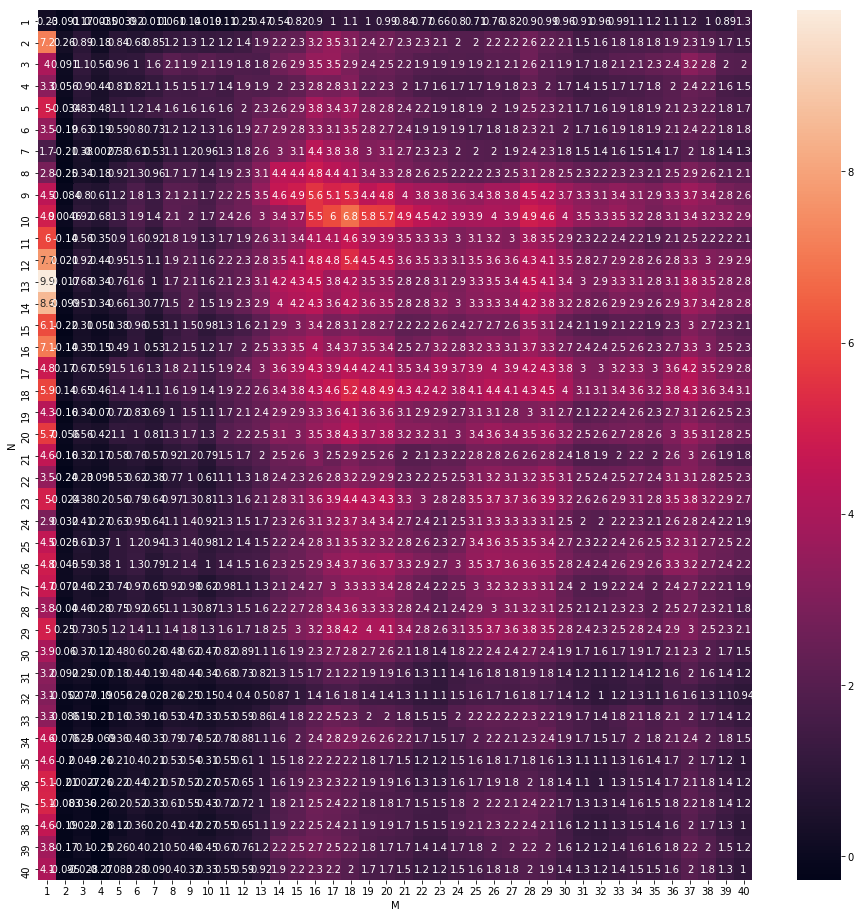

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/ETFROTATION-A-2011-2019-20190604-074241.csv')
len(df)
# df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
# df.columns
df = df.loc[:, ['N', 'K', 'M', 'ORDER', 'RETURN_ALGO', 'RETURN_BENC', 'MAXDROPDOWN_ALGO', 'MAXDROPDOWN_BENC', 'WINRATE_ORDER', 'WINRATE_YEARLY', 'ANNUAL_RETURN']]
df.head()
df.describe()

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['RETURN_ALGO'] > RETURN_ALGO_md]

WINRATE_YEARLY_md = df['WINRATE_YEARLY'].describe(percentiles=[.75, .90, .95])['95%']
# df[df['WINRATE_YEARLY'] > WINRATE_YEARLY_md]

MAXDROPDOWN_ALGO_md = df['MAXDROPDOWN_ALGO'].describe(percentiles=[.75, .90, .95])['95%']

df[(df['RETURN_ALGO'] > RETURN_ALGO_md) & (df['MAXDROPDOWN_ALGO'] > MAXDROPDOWN_ALGO_md)]

RETURN_ALGO_md = df['RETURN_ALGO'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN_ALGO'] > RETURN_ALGO_md]
heat_df = df.pivot(index='N', columns='M', values='RETURN_ALGO')
# heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-TT-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/2005-2019-399300-MA-PARAMTEST-20190305.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-TT-PARAMTEST-20190306.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
df = df[df['RETURN'] > md]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 16]

df = pd.read_csv('../database/000905-2007-2019-MA-PARAMTEST-20190307.csv')
len(df)
df = df.drop(columns=['MA_SHORT', 'MA_LONG', 'X_DAY_RETURN', 'RET_PER_YEAR', 'MISS_SIGNAL', 'LASTYEAR_RETURN'])
df.head()
df.describe()

# md = df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']
# df = df[df['RETURN'] > md]
df[df['RETURN'] > df['RETURN'].describe(percentiles=[.75, .90, .95])['75%']]

heat_df = df.pivot(index='ROLLMAX', columns='ROLLMIN', values='RETURN')
heat_df
ax = sns.heatmap(heat_df, annot=True)